# Ford gobike data analysis
## by Seifeldin Mostafa

## Investigation Overview

> The goal of this presentation is to provide some interesting insights from the Ford gobike data

## Dataset Overview

> The dataset contained detailed informations about trips made by Ford gobike users

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
ford_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# load in the dataset into a pandas dataframe
top_50_ford_bikes = (ford_bike.bike_id.value_counts()[:50]) 
order_index = top_50_ford_bikes.index

top_50_ford_bikes = pd.DataFrame({'bike_id': top_50_ford_bikes.index , 'count': top_50_ford_bikes})

top_50_ford_bikes = ford_bike[ ford_bike.bike_id.isin(top_50_ford_bikes.bike_id)]

top_50_ford_bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
17,674,2019-02-28 23:48:25.0950,2019-02-28 23:59:40.0920,74.0,Laguna St at Hayes St,37.776435,-122.426244,336.0,Potrero Ave and Mariposa St,37.763281,-122.407377,5343,Subscriber,1975.0,Male,No
54,401,2019-02-28 23:30:52.4710,2019-02-28 23:37:33.9550,58.0,Market St at 10th St,37.776619,-122.417385,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,5407,Subscriber,1990.0,Female,No
86,175,2019-02-28 23:15:09.9130,2019-02-28 23:18:05.7640,140.0,Cesar Chavez St at Dolores St,37.747858,-122.424986,132.0,24th St at Chattanooga St,37.751819,-122.426614,5048,Subscriber,1981.0,Male,No
166,676,2019-02-28 22:33:19.2420,2019-02-28 22:44:35.3550,86.0,Market St at Dolores St,37.769305,-122.426826,139.0,Garfield Square (25th St at Harrison St),37.751017,-122.411901,4773,Subscriber,1984.0,Female,No
171,522,2019-02-28 22:33:25.6070,2019-02-28 22:42:08.2090,125.0,20th St at Bryant St,37.759200,-122.409851,60.0,8th St at Ringold St,37.774520,-122.409449,4812,Subscriber,1989.0,Male,No


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## The most popular 20 bikes used by Ford gobike users

> The Leading bike used by Ford gobike is the one with bike_id `4794`

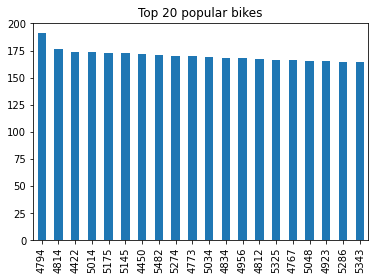

In [4]:
sorted_counts = ford_bike.bike_id.value_counts()

top_20_start_stations = sorted_counts[:20]

top_20_start_stations.plot(kind = 'bar')

plt.title ('Top 20 popular bikes');

## Dive into the Ford gobike users types analysis  

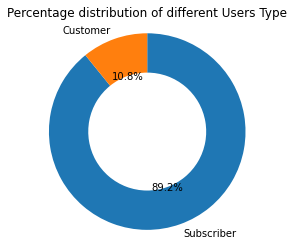

In [5]:
sorted_counts = ford_bike.user_type.value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4},  autopct='%1.1f%%' );
plt.axis('square');

plt.title('Percentage distribution of different Users Type');

> This Figure shows that 10.8 % of our dataset user types are Customers, while the remaining 89.2% are Subscribers 

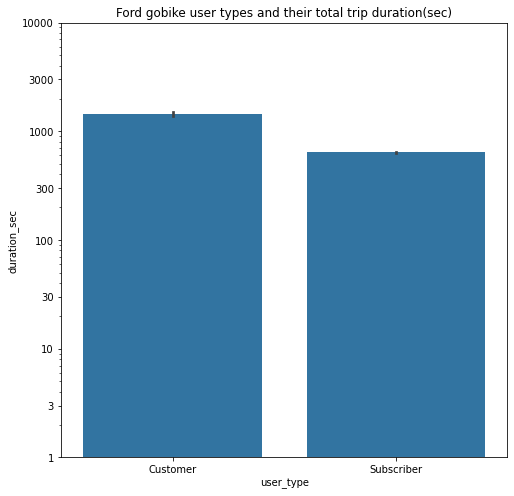

In [6]:
percentage = np.arange(0, 1 , 0.1 )
stats = np.log10(ford_bike.duration_sec.describe(percentage)) 
np.log10(ford_bike.duration_sec.describe(percentage))
step_size = 0.05 
bins = 10 ** np.arange(stats['min'] - step_size, stats['max'] + step_size, step_size )


plt.figure(figsize=(8,8));

base_color = sb.color_palette()[0]
sb.barplot(data = ford_bike, x='user_type', y='duration_sec', color=base_color)

plt.yscale('log')
plt.title('Ford gobike user types and their total trip duration(sec)')

ticks = [ 1, 3, 10, 30, 100, 300 , 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels);

> Despite the fact that customers are the minority of the dataset population, however they spend more time on total on Ford gobike trips 

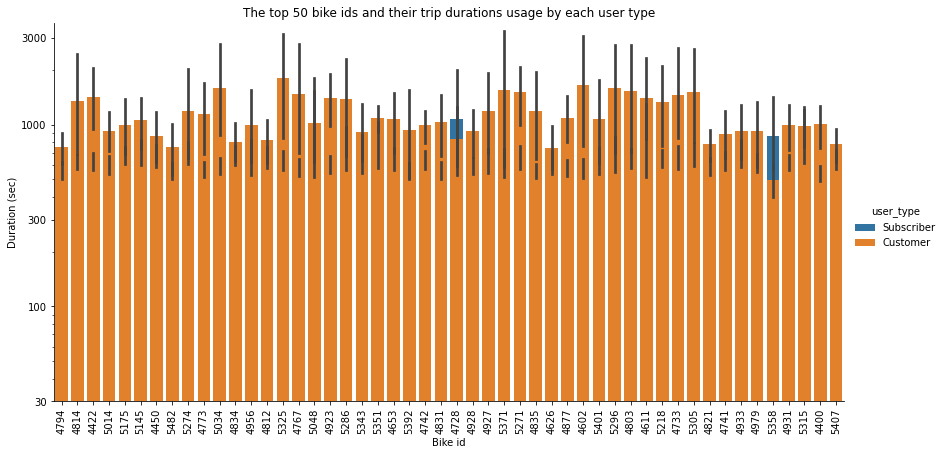

In [7]:
percentage = np.arange(0, 1 , 0.1 )
stats = np.log10(top_50_ford_bikes.duration_sec.describe(percentage)) 
np.log10(top_50_ford_bikes.duration_sec.describe(percentage))
step_size = 0.05 
bins = 10 ** np.arange(stats['min'] - step_size, stats['max'] + step_size, step_size )


g = sb.FacetGrid(data = top_50_ford_bikes, hue = 'user_type', height = (6), aspect = 2 );
g.map(sb.barplot, 'bike_id', 'duration_sec', order = order_index );
plt.xticks(rotation = 90);
plt.yscale('log')

ticks = [ 30, 100, 300 , 1000, 3000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels);

plt.xlabel('Bike id')
plt.ylabel('Duration (sec)')

g.add_legend() 
plt.title('The top 50 bike ids and their trip durations usage by each user type');

> As you can notice in this figure, the majority the top bikes ids with respect to the duration is mostly influenced by the `Customer` user type. So, if the plan is to boost the one-time customer segment of the Ford gobike, I would highly recommend availing the bike with id `5325` 

*this should not be used to influence the business decisions for `Subscribers` ford gobike* 

## Dive into the Ford gobike gender analysis  

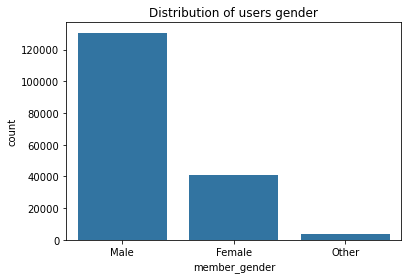

In [8]:
sorted_counts = ford_bike.member_gender.value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data = ford_bike, x = 'member_gender', order = sorted_counts, color = base_color );
plt.title('Distribution of users gender');

> This Figure shows that the majority of our dataset are Males, followed by a huge gap are Females then others 

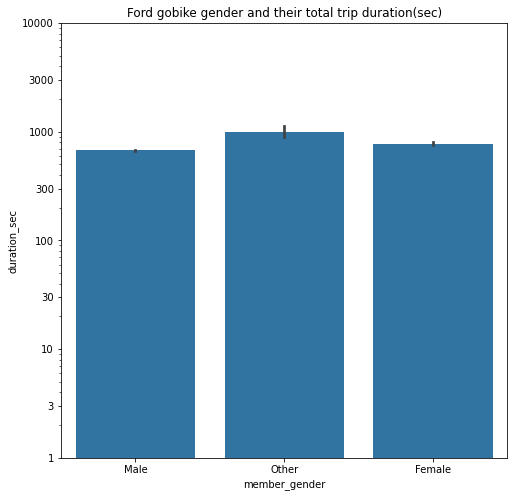

In [9]:
percentage = np.arange(0, 1 , 0.1 )
stats = np.log10(ford_bike.duration_sec.describe(percentage)) 
np.log10(ford_bike.duration_sec.describe(percentage))
step_size = 0.05 
bins = 10 ** np.arange(stats['min'] - step_size, stats['max'] + step_size, step_size )


plt.figure(figsize=(8,8));

base_color = sb.color_palette()[0]
sb.barplot(data = ford_bike, x='member_gender', y='duration_sec', color=base_color)
plt.title('Ford gobike gender and their total trip duration(sec)')

plt.yscale('log')

ticks = [ 1, 3, 10, 30, 100, 300 , 1000, 3000, 10000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels);

> Despite the fact that males are the majority of the dataset population, however they spend the least total time on Ford gobike trips 

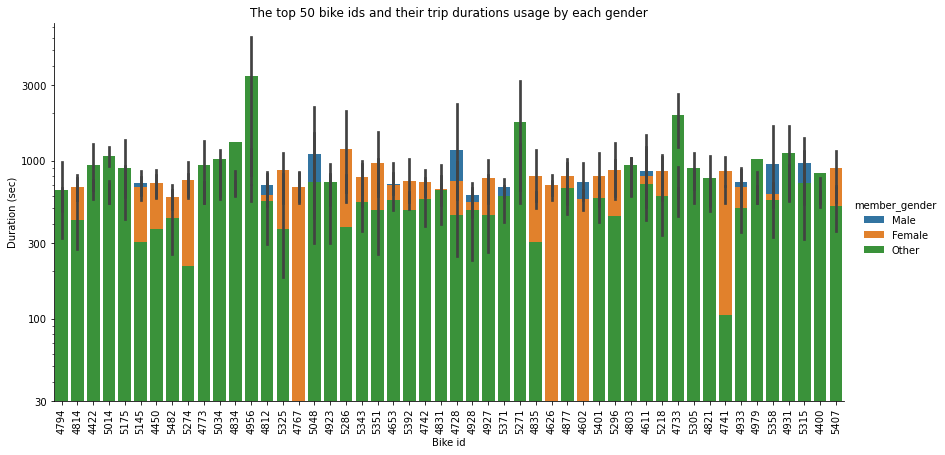

In [10]:
percentage = np.arange(0, 1 , 0.1 )
stats = np.log10(top_50_ford_bikes.duration_sec.describe(percentage)) 
np.log10(top_50_ford_bikes.duration_sec.describe(percentage))
step_size = 0.05 
bins = 10 ** np.arange(stats['min'] - step_size, stats['max'] + step_size, step_size )


g = sb.FacetGrid(data = top_50_ford_bikes, hue = 'member_gender', height = (6), aspect = 2);
g.map(sb.barplot, 'bike_id', 'duration_sec', order = order_index );
plt.xticks(rotation = 90);
plt.yscale('log')

ticks = [ 30, 100, 300 , 1000, 3000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels);

plt.xlabel('Bike id')
plt.ylabel('Duration (sec)')

g.add_legend() 
plt.title('The top 50 bike ids and their trip durations usage by each gender');

> As you can notice in this figure, the majority the top bikes ids with respect to the duration is mostly influenced by the Other gender. So, if the plan is to boost the other gender, I would highly recommend availing the bike with id 4956

*These bike ids are not to be used as a generalized bikes prefered for all ford gobike genders, the majority of our dataset are male users not others*

# The most popular starting and ending points for Ford gobike trips



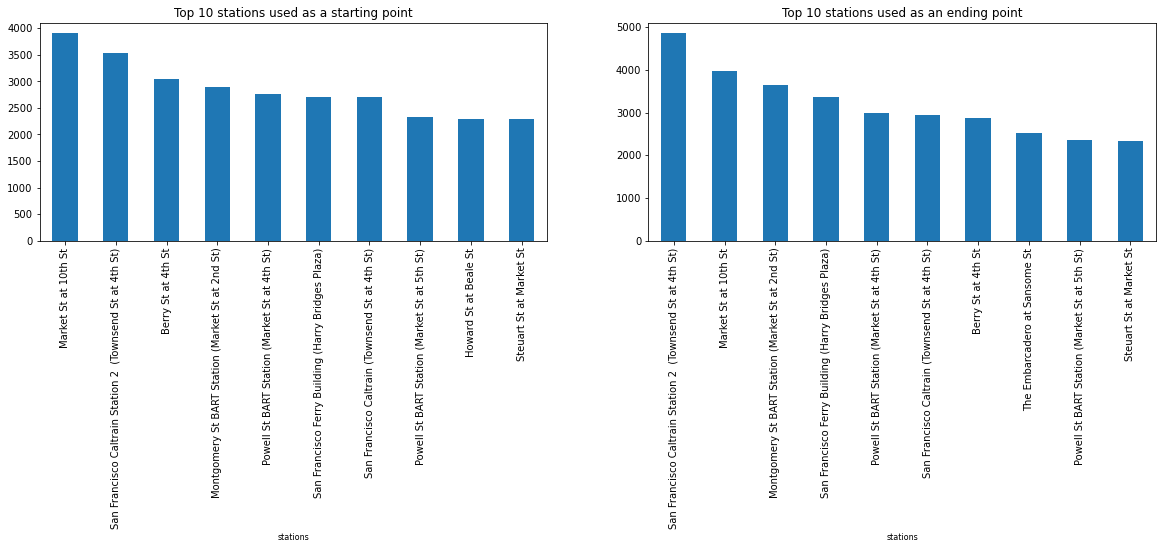

In [11]:
plt.figure(figsize = [20, 4]) 
plt.subplot(1, 2, 1)
    
sorted_counts = ford_bike.start_station_name.value_counts()

top_10_start_stations = sorted_counts[:10]

top_10_start_stations.plot(kind = 'bar')
plt.xlabel('stations', fontsize = 8)
plt.title ('Top 10 stations used as a starting point');

plt.subplot(1, 2, 2)

sorted_counts = ford_bike.end_station_name.value_counts()

top_10_start_stations = sorted_counts[:10]

top_10_start_stations.plot(kind = 'bar')

plt.xlabel('stations', fontsize = 8)

plt.title ('Top 10 stations used as an ending point');

`Market St at 10th St`and `San Fransisco Sation 2` are the top visited points by Ford Gobike users. These locations might be a great spot for marketing and brand awareness 

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [12]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --TemplateExporter.exclude_input=True

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 759395 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_template.slides.html
Use Control-C to stop this server
^C

Interrupted
